In [2]:
def rk4(f, x0, t0, t1, n, param = []):
    '''
    Solve the IVP 
        dot(x) = f(x, t, param) 
    Initial conditions:
        x(t0) = x0
    from t0 to t1 (n steps)    
    '''
    import numpy as np
    if type(x0) is list:
        vx = np.array([np.array([float(0)]*len(x0))]*(n+1))
    else:
        vx = np.array([float(0)]*(n+1))   

    time = [0]*(n+1)
    vx[0] = x0
    x = x0
    time[0] = t0
    t = t0
    
    h = (t1 - t0)/float(n)
    for i in range(1,n+1):
        k1 = h*np.array(f(x, t, param))
        k2 = h*np.array(f(x + 0.5*k1, t + 0.5*h, param))
        k3 = h*np.array(f(x + 0.5*k2, t + 0.5*h, param))
        k4 = h*np.array(f(x + k3, t + h, param))
        vx[i] = x + (1.0/6)*(k1 + 2*k2 + 2*k3 + k4)
        time[i] = t0 + i*h 
        t = time[i]
        x = vx[i]
    if type(x0) is list:
        res_vx = [list(k) for k in vx]
    else:
        res_vx = [k for k in vx]
    return res_vx, time


In [3]:
# Test for rk4

import math

def check_rk4(y, t, param = []):
    '''
    Solving differential equation dot(y) = y ; y(0) = 1, t0 = 0, t = 5, n = 1000   
    '''
    return y

def check_rk4_2(y, t, param = []):
    '''
    Solving differential equation dot(y1) = y1 + y2, dot(y2) = y1 - y2; y(0) = [10, 5], t0 = 0, t = 5, n = 1000   
    '''
    return [y[1], y[0]]

def check_rk4_3(y, t, param = []):
    '''
    Solving differential equation dot(y1) = y1 , dot(y2) = - y2; y(0) = [1, 1], t0 = 0, t = 5, n = 1000   
    '''
    return [y[0] , -y[1]]

def check_rk4_4(y, t, param = []):
    '''
    Solving differential equation dot(y1) = y1 , dot(y2) = - y2; y(0) = [1, 1], t0 = 0, t = 5, n = 1000   
    '''
    return [-y[1] , y[0]]


def run_rk4_on_check_rk4():
    y0 = 1
    t0 = 0
    t1 = 5
    n = 1000
    y,t = rk4(check_rk4, y0, t0, t1, n)
    print( max( [ abs((y[i] - math.exp(t[i]))) for i in range(n+1) ] ) )
    
def run_rk4_on_check_rk4_2():
    y0 = [2, 0]
    t0 = 0
    t1 = 5
    n = 1000
    y,t = rk4(check_rk4_2, y0, t0, t1, n)
    print( max( [ abs((y[i][0] - math.exp(t[i]) - math.exp(-t[i]) )) for i in range(n+1) ] ), \
           max( [ abs((y[i][1] - math.exp(t[i]) + math.exp(-t[i]) )) for i in range(n+1) ] )  ) 

def run_rk4_on_check_rk4_3():
    y0 = [1, 1]
    t0 = 0
    t1 = 5
    n = 1000
    y,t = rk4(check_rk4_3, y0, t0, t1, n)
    print( max( [ abs((y[i][0] - math.exp(t[i]))) for i in range(n+1) ] ), \
           max( [ abs((y[i][1] - math.exp(-t[i]))) for i in range(n+1) ] )  )    

def run_rk4_on_check_rk4_4():
    y0 = [1, -1]
    t0 = 0
    t1 = 5
    n = 1000
    y,t = rk4(check_rk4_4, y0, t0, t1, n)
    print( max( [ abs((y[i][0] - math.sin(t[i]) - math.cos(t[i]) )) for i in range(n+1) ] ), \
           max( [ abs((y[i][1] - math.sin(t[i]) + math.cos(t[i]) )) for i in range(n+1) ] )  ) 
    
run_rk4_on_check_rk4()
run_rk4_on_check_rk4_2()
run_rk4_on_check_rk4_3()
run_rk4_on_check_rk4_4()

3.84875420423e-09
3.84863062773e-09 3.84901988927e-09
3.84875420423e-09 1.92412752398e-12
3.22830095989e-11 2.98426838796e-11


In [12]:
def read_parameters(path):
    parameters = open(path,'rt')
    parameters = parameters.readlines()
    parameters = parameters[0].rstrip()
    parameters = parameters.split(',')
    parameters = [float(n) for n in parameters]
    return parameters

def dynamics(state, t, param = []):
    m = param[0]
    c = param[1]
    k = param[2]
    force = param[3]
    if force is not None:
        f = force(state,t)
    else:
        f = 0
    zeta = c/(2*(k*m)**0.5)
    omega_o = (k/m)**0.5
    state_dot = [state[1], -2*zeta*omega_o*state[1] - state[0]*omega_o**2 + f/m]
    return state_dot

def force(state, t):
    return 4*math.sin(2*t)

In [13]:
import matplotlib.pyplot as plt
import os

base_path = os.getcwd()
path = os.path.join(base_path,'parameters.txt')
m,c,k = read_parameters(path)

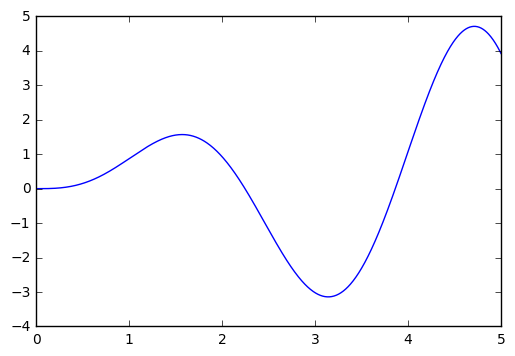

In [15]:
y, t = rk4(dynamics, [0,0], 0, 5, 1000, [m,c,k,force])
plt.figure(1)
plt.plot(t,[k[0] for k in y])
plt.show()

In [19]:
E-5

NameError: name 'E' is not defined